### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


### Task #1: Merge the 12 months data into a single dataframe

In [2]:
# Read all the files and concat it into a single dataframe

files  = [file for file in os.listdir(r'D:\Avinash Coding\Python\SalesAnalysis\Sales_Data')]

df = pd.DataFrame()

for file in files:
    df_=pd.read_csv('D:/Avinash Coding/Python/SalesAnalysis/Sales_Data/'+file)
    df=pd.concat([df,df_])

df.to_csv('combined_data.csv',index=False)

df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!!

In [4]:
df[df['month'].isna()]
df = df.dropna(how='all')

In [5]:
df[df['month'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month


#### Find 'Or' and delete it

In [6]:
df[df['month']=='Or']

df= df[df['month']!='Or'] # exclude the month containing 'Or as value

### Change datatype of the columns

In [7]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                object
dtype: object

### Add new columns

#### Task #2: Add month column

In [8]:
df['month']=df['Order Date'].str[0:2]
df['month']=df['month'].astype(int)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task #3: Add Sales column

In [9]:
df['Sales'] = df['Quantity Ordered'] *  df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add city column 

In [10]:
def get_city(x):
    return x.split(',')[1]

def get_state(x):
    return x.split(',')[2].split(' ')[1]    

df['city'] = df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Question 1: What was the best month for sales? How much was earned that month?

In [11]:
sales_df=df.groupby('month').agg({'Sales':'sum'}).reset_index()
sales_df.sort_values(by='Sales',ascending=False)

,month,Sales
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24
10,11,3199603.20
4,5,3152606.75
2,3,2807100.38
6,7,2647775.76
5,6,2577802.26
7,8,2244467.88
1,2,2202022.42


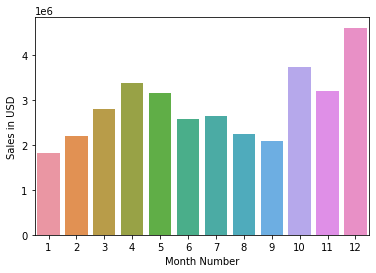

In [12]:
sns.barplot(x=sales_df['month'],y=sales_df['Sales'])
plt.xlabel('Month Number')
plt.ylabel('Sales in USD')
plt.show()

### Question 2: Which city had the highest number of sales?

In [13]:
df_city=df.groupby('city').agg({'Sales':'sum'}).reset_index()
df_city.sort_values(by='Sales',ascending=True)

,city,Sales
6,Portland (ME),449758.27
1,Austin (TX),1819581.75
7,Portland (OR),1870732.34
9,Seattle (WA),2747755.48
3,Dallas (TX),2767975.40
0,Atlanta (GA),2795498.58
2,Boston (MA),3661642.01
5,New York City (NY),4664317.43
4,Los Angeles (CA),5452570.80
8,San Francisco (CA),8262203.91


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' Atlanta (GA)'),
  Text(1, 0, ' Austin (TX)'),
  Text(2, 0, ' Boston (MA)'),
  Text(3, 0, ' Dallas (TX)'),
  Text(4, 0, ' Los Angeles (CA)'),
  Text(5, 0, ' New York City (NY)'),
  Text(6, 0, ' Portland (ME)'),
  Text(7, 0, ' Portland (OR)'),
  Text(8, 0, ' San Francisco (CA)'),
  Text(9, 0, ' Seattle (WA)')])

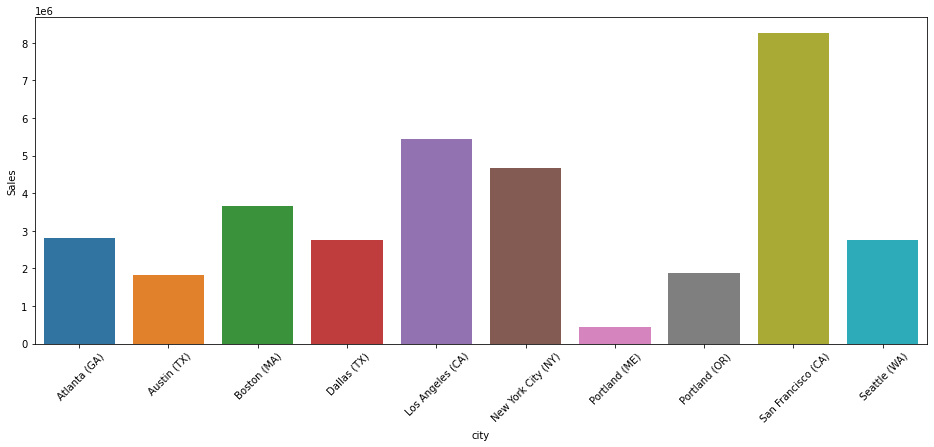

In [14]:
plt.figure(figsize=(16,6))

sns.barplot(x=df_city['city'],y=df_city['Sales'])

plt.xticks(rotation=45)

### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [20]:
df['hour'] = df['Order Date'].dt.hour
df['minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [42]:
df_hour = df.groupby('hour').agg({'Order ID':'count'}).reset_index()
df_hour

,hour,Order ID
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


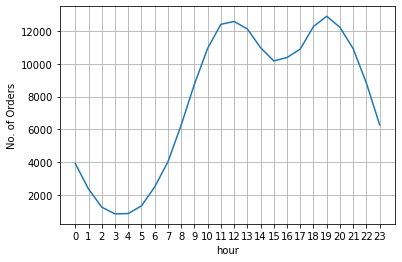

In [48]:
sns.lineplot(x=df_hour['hour'],y=df_hour['Order ID'])
plt.xticks(df_hour['hour'])
plt.ylabel('No. of Orders')
plt.grid()
plt.show()

### Question 4: What products are most often sold together?

In [50]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [60]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup['grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_dup

C:\Users\avina\AppData\Local\Temp\ipykernel_13280\2267718563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,hour,minute,grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49,"Google Phone,USB-C Charging Cable"


In [66]:
df_final=df_dup.groupby('grouped').agg({'Order ID':'count'}).reset_index()
df_final.sort_values('Order ID',ascending=False)

,grouped,Order ID
342,"iPhone,Lightning Charging Cable",1764
173,"Google Phone,USB-C Charging Cable",1712
363,"iPhone,Wired Headphones",722
299,"Vareebadd Phone,USB-C Charging Cable",624
191,"Google Phone,Wired Headphones",606
...,...,...
330,"iPhone,27in FHD Monitor",2
202,"LG Dryer,Lightning Charging Cable",2
201,"LG Dryer,Google Phone",2
200,"LG Dryer,Flatscreen TV",2


In [77]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_dup['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


### Question 5: What product sold the most? Why do you think it sold the most?

In [86]:
df_product = df.groupby('Product').agg({'Quantity Ordered':'sum'}).reset_index()
df_product = df_product.sort_values('Quantity Ordered',ascending=False)
df_product

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


C:\Users\avina\AppData\Local\Temp\ipykernel_13280\431053835.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_product['Product'],rotation='vertical',size=8)


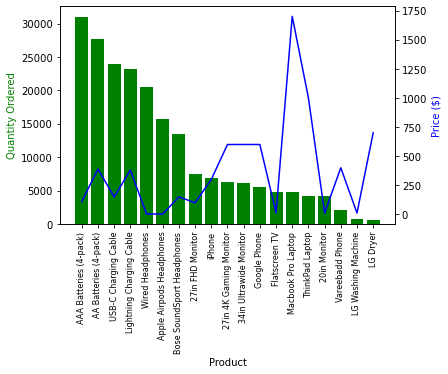

In [100]:
price = df.groupby('Product').agg({'Price Each':'mean'}).reset_index()


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(df_product['Product'],df_product['Quantity Ordered'],color='g')
ax2.plot(df_product['Product'],price['Price Each'], 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(df_product['Product'],rotation='vertical',size=8)

plt.show()